In [19]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ydata_profiling import ProfileReport

df = pd.read_csv("data/silver.csv")
pd.set_option('display.max_columns', None)  

In [20]:
df

,Invoice,StockCode,Quantity,InvoiceDate,year,month,Price,Customer ID,Country,Total,total_facture,total_client_années,nombre_commande_client_années_2009,nombre_commande_client_années_2010,nombre_commande_client_années_2011
0,489434,85048,12,2009-12-01,2009,12,6.95,13085.0,United Kingdom,83.40,505.30,27639.60,4.0,3.0,3.0
1,489434,79323P,12,2009-12-01,2009,12,6.75,13085.0,United Kingdom,81.00,505.30,27639.60,4.0,3.0,3.0
2,489434,79323W,12,2009-12-01,2009,12,6.75,13085.0,United Kingdom,81.00,505.30,27639.60,4.0,3.0,3.0
3,489434,22041,48,2009-12-01,2009,12,2.10,13085.0,United Kingdom,100.80,505.30,27639.60,4.0,3.0,3.0
4,489434,21232,24,2009-12-01,2009,12,1.25,13085.0,United Kingdom,30.00,505.30,27639.60,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824359,581587,22899,6,2011-12-09,2011,12,2.10,12680.0,France,12.60,267.45,13193.46,0.0,0.0,4.0
824360,581587,23254,4,2011-12-09,2011,12,4.15,12680.0,France,16.60,267.45,13193.46,0.0,0.0,4.0
824361,581587,23255,4,2011-12-09,2011,12,4.15,12680.0,France,16.60,267.45,13193.46,0.0,0.0,4.0
824362,581587,22138,3,2011-12-09,2011,12,4.95,12680.0,France,14.85,267.45,13193.46,0.0,0.0,4.0


In [21]:
print(df.columns)


Index(['Invoice', 'StockCode', 'Quantity', 'InvoiceDate', 'year', 'month',
       'Price', 'Customer ID', 'Country', 'Total', 'total_facture',
       'total_client_années', 'nombre_commande_client_années_2009',
       'nombre_commande_client_années_2010',
       'nombre_commande_client_années_2011'],
      dtype='object')


In [22]:
# profile =ProfileReport(df, title = "Profiling Report")
# profile.to_widgets()

In [23]:
Country_uniques = df['Country'].unique()
print(Country_uniques)

['United Kingdom' 'France' 'USA' 'Belgium' 'Australia' 'EIRE' 'Germany'
 'Portugal' 'Japan' 'Denmark' 'Netherlands' 'Poland' 'Spain'
 'Channel Islands' 'Italy' 'Cyprus' 'Greece' 'Norway' 'Austria' 'Sweden'
 'United Arab Emirates' 'Finland' 'Switzerland' 'Unspecified' 'Nigeria'
 'Malta' 'RSA' 'Singapore' 'Bahrain' 'Thailand' 'Israel' 'Lithuania'
 'West Indies' 'Korea' 'Brazil' 'Canada' 'Iceland' 'Lebanon'
 'Saudi Arabia' 'Czech Republic' 'European Community']


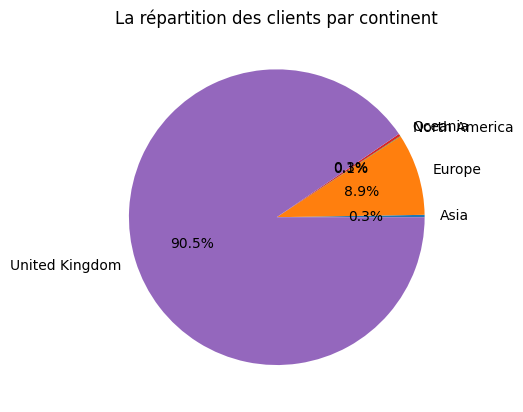

In [24]:
country_to_continent = {
    'United Kingdom': 'United Kingdom',
    'France': 'Europe',
    'USA': 'North America',
    'Belgium': 'Europe',
    'Australia': 'Oceania',
    'EIRE': 'Europe',
    'Germany': 'Europe',
    'Portugal': 'Europe',
    'Japan': 'Asia',
    'Denmark': 'Europe',
    'Netherlands': 'Europe',
    'Poland': 'Europe',
    'Spain': 'Europe',
    'Channel Islands': 'Europe',
    'Italy': 'Europe',
    'Cyprus': 'Asia',
    'Greece': 'Europe',
    'Norway': 'Europe',
    'Austria': 'Europe',
    'Sweden': 'Europe',
    'United Arab Emirates': 'Asia',
    'Finland': 'Europe',
    'Switzerland': 'Europe',
    # Add the remaining countries here
}

df['Continent'] = df['Country'].map(country_to_continent)

data = df.groupby('Continent')['Invoice'].nunique()
plt.pie(data, labels=data.index, autopct='%1.1f%%')
plt.title('La répartition des clients par continent')

plt.show()


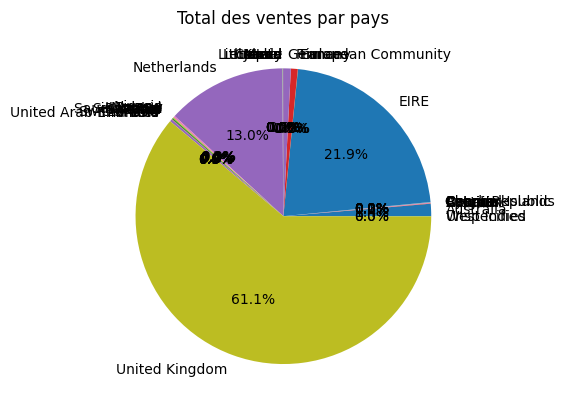

In [25]:
data = df.groupby('Country')['total_client_années'].sum()
plt.pie(data, labels=data.index, autopct='%1.1f%%')
plt.title('Total des ventes par pays')
plt.show()


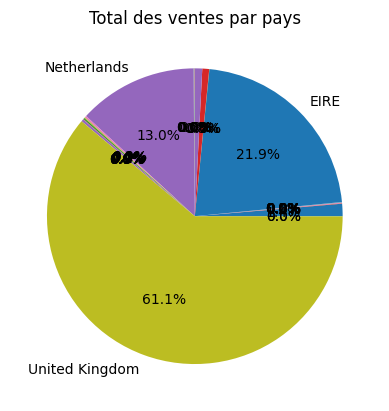

In [26]:
data = df.groupby('Country')['total_client_années'].sum()
total = data.sum()
labels = [label if value / total > 0.1 else '' for label, value in data.items()]
plt.pie(data, labels=labels, autopct='%1.1f%%')
plt.title('Total des ventes par pays')
plt.show()


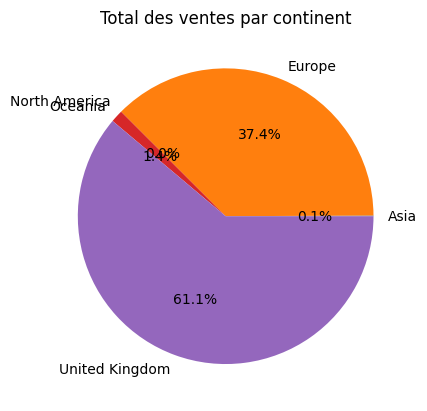

In [27]:
country_to_continent = {
    'United Kingdom': 'United Kingdom',
    'France': 'Europe',
    'USA': 'North America',
    'Belgium': 'Europe',
    'Australia': 'Oceania',
    'EIRE': 'Europe',
    'Germany': 'Europe',
    'Portugal': 'Europe',
    'Japan': 'Asia',
    'Denmark': 'Europe',
    'Netherlands': 'Europe',
    'Poland': 'Europe',
    'Spain': 'Europe',
    'Channel Islands': 'Europe',
    'Italy': 'Europe',
    'Cyprus': 'Asia',
    'Greece': 'Europe',
    'Norway': 'Europe',
    'Austria': 'Europe',
    'Sweden': 'Europe',
    'United Arab Emirates': 'Asia',
    'Finland': 'Europe',
    'Switzerland': 'Europe',
    # Add the remaining countries here
}

df['Continent'] = df['Country'].map(country_to_continent)

data = df.groupby('Continent')['total_client_années'].sum()
plt.pie(data, labels=data.index, autopct='%1.1f%%')
plt.title('Total des ventes par continent')
plt.show()


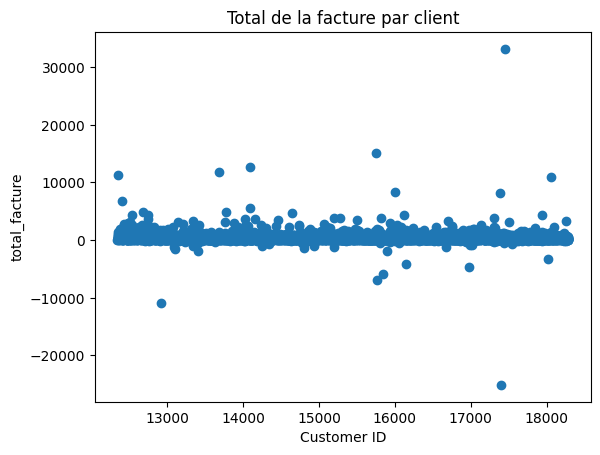

In [31]:
# Créez un masque pour supprimer les doublons de 'Customer ID'
mask = df.duplicated(subset=['Customer ID'], keep='first')
df_filtered = df[~mask]

# Créez le scatter plot
plt.scatter(df_filtered['Customer ID'], df_filtered['total_facture'])
plt.xlabel('Customer ID')
plt.ylabel('total_facture')
plt.title('Total de la facture par client') # Ajout d'un titre

plt.show()

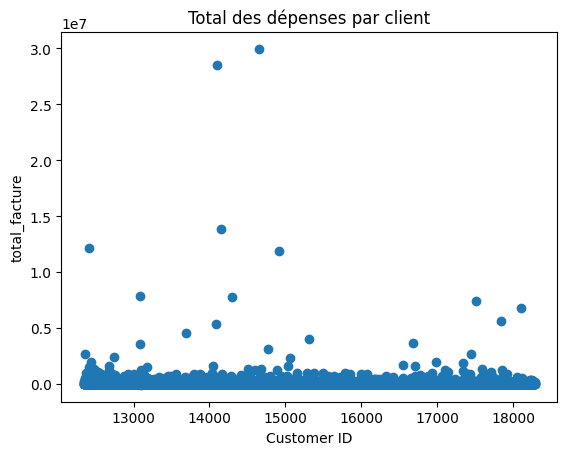

In [34]:
# Créez un masque pour supprimer les doublons de 'Customer ID'
mask = df.duplicated(subset=['Customer ID'], keep='first')
df_filtered = df[~mask]

# Créez le scatter plot
plt.scatter(df_filtered['Customer ID'], df_filtered['total_client_années'])
plt.xlabel('Customer ID')
plt.ylabel('total_facture')
plt.title('Total des dépenses par client') # Ajout d'un titre

plt.show()